In [ ]:
# Advanced OCR Analysis
# Tesseract vs Easyocr vs Kerasocr

In [ ]:
!pip install keras-ocr --upgrade --force-reinstall -q
!pip install --force-reinstall -v "tensorflow==2.15.1" -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.1 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.0 which is incompatible.
langchain 0.3.12 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.1 which is incompatible.
pytensor 2.26.4 requires numpy<2,>=1.17.0, but you have numpy 2.2.1 which is incompatible.
tensorflow 2.17.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.2.1 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.1 which is incompatible.
  Using cac

In [ ]:
!pip install easyocr -q
!pip install pytesseract -q
!apt-get install tesseract-ocr -q

Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Import libraries
import easyocr
import keras_ocr
import pytesseract
from pytesseract import Output
import cv2
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
# Tesseract OCR
def extract_text_with_tesseract(image_path):
    """
    Extracts text from an image using Tesseract OCR.
    """
    try:
        # Read the image
        image = cv2.imread(image_path)

        # Perform OCR using Tesseract
        start_time = time.time()
        extracted_text = pytesseract.image_to_string(image)
        end_time = time.time()

        time_taken = end_time - start_time
        return extracted_text, time_taken

    except Exception as e:
        return f"Error occurred: {str(e)}", 0

In [ ]:
# Easy OCR
def extract_with_easyocr(image_path):
    """
    Extracts text and bounding boxes from an image using EasyOCR and measures time.
    """
    reader = easyocr.Reader(['en'], gpu=True)
    start_time = time.time()
    results = reader.readtext(image_path)
    end_time = time.time()
    df = pd.DataFrame(results, columns=['bbox', 'text', 'conf'])
    time_taken = end_time - start_time
    return df, time_taken

In [ ]:
# Keras OCR
def extract_with_kerasocr(image_path):
    """
    Extracts text and bounding boxes from an image using KerasOCR and measures time.
    """
    pipeline = keras_ocr.pipeline.Pipeline()
    start_time = time.time()
    results = pipeline.recognize([image_path])
    end_time = time.time()
    df = pd.DataFrame(results[0], columns=['text', 'bbox'])
    time_taken = end_time - start_time
    return df, time_taken

In [ ]:
# Visualization for comparison
def plot_compare(img_fn, easyocr_df, kerasocr_df):
    """
    Plots EasyOCR and KerasOCR results side by side for a single image.
    """
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # EasyOCR results
    easy_results = easyocr_df[['text', 'bbox']].values.tolist()
    easy_results = [(x[0], np.array(x[1])) for x in easy_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), easy_results, ax=axs[0])
    axs[0].set_title('EasyOCR Results', fontsize=24)

    # KerasOCR results
    keras_results = kerasocr_df[['text', 'bbox']].values.tolist()
    keras_results = [(x[0], np.array(x[1])) for x in keras_results]
    keras_ocr.tools.drawAnnotations(plt.imread(img_fn), keras_results, ax=axs[1])
    axs[1].set_title('KerasOCR Results', fontsize=24)

    plt.show()

Test Image 1


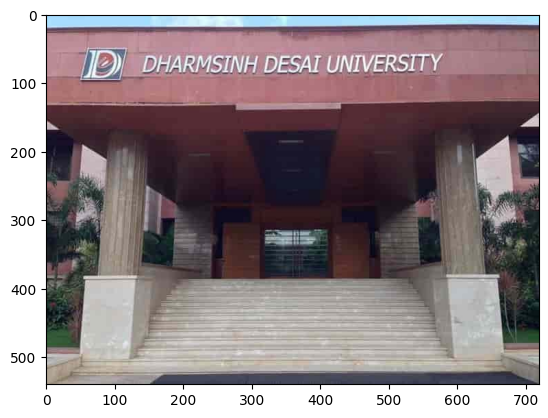


Test Image 2


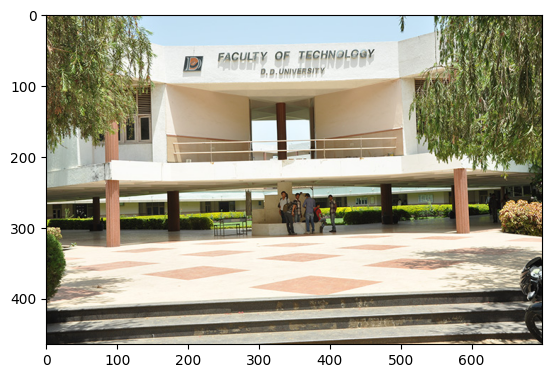

In [ ]:
# Path to the input image
image_path_1 = "/content/drive/MyDrive/Task5/test_image/ddu_2.jpg"
image_path_2 = "/content/drive/MyDrive/Task5/test_image/ddu.jpg"

# Process image
img_1 = cv2.imread(image_path_1)
img_rgb_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
print("Test Image 1")
plt.imshow(img_rgb_1)
plt.show()
img_2 = cv2.imread(image_path_2)
img_rgb_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
print("\nTest Image 2")
plt.imshow(img_rgb_2)
plt.show()

In [ ]:
# Tesseract OCR
print("\nUsing Tesseract OCR...")
tesseract_text, tesseract_time = extract_text_with_tesseract(image_path_1)
print(f"\nTesseract Results For Test Image 1:\n{tesseract_text}")
print(f"Time taken: {tesseract_time:.2f} seconds")
tesseract_text, tesseract_time = extract_text_with_tesseract(image_path_2)
print(f"\nTesseract Results For Test Image 2:\n{tesseract_text}")
print(f"Time taken: {tesseract_time:.2f} seconds")


Using Tesseract OCR...

Tesseract Results For Test Image 1:
 

Time taken: 0.95 seconds

Tesseract Results For Test Image 2:
 
      

GULTY OF TEGHN@L@eY
2,2, UNIVERSITY

Time taken: 1.11 seconds


In [ ]:
# EasyOCR
print("\nUsing EasyOCR...")
easyocr_df_1, easyocr_time_1 = extract_with_easyocr(image_path_1)
print(f"\n\nEasyOCR Results For Test Image 1:\n{easyocr_df_1[['text', 'conf']]}")
print(f"Time taken: {easyocr_time_1:.2f} seconds")
easyocr_df_2, easyocr_time_2 = extract_with_easyocr(image_path_2)
print(f"\n\nEasyOCR Results For Test Image 2:\n{easyocr_df_2[['text', 'conf']]}")
print(f"Time taken: {easyocr_time_2:.2f} seconds")


Using EasyOCR...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete



EasyOCR Results For Test Image 1:
                         text      conf
0  DHARMSINH DESAI UNIVERSITY  0.885446
Time taken: 14.76 seconds


EasyOCR Results For Test Image 2:
         text      conf
0     FACULTY  0.982230
1          OF  0.778774
2  TECHNOLOuY  0.525393
3  university  0.658975
Time taken: 5.72 seconds


In [ ]:
# KerasOCR
print("\nUsing KerasOCR...")
kerasocr_df_1, kerasocr_time_1 = extract_with_kerasocr(image_path_1)
print(f"\n\nKerasOCR Results For Test Image 1:\n{kerasocr_df_1[['text']]}")
print(f"Time taken: {kerasocr_time_1:.2f} seconds")
kerasocr_df_2, kerasocr_time_2 = extract_with_kerasocr(image_path_2)
print(f"\n\nKerasOCR Results For Test Image 2:\n{kerasocr_df_2[['text']]}")
print(f"Time taken: {kerasocr_time_2:.2f} seconds")


Using KerasOCR...
Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 3s 3s/step


KerasOCR Results For Test Image 1:
         text
0  university
1   dharmsinh
2       desai
Time taken: 44.88 seconds
Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 3s 3s/step


KerasOCR Results For Test Image 2:
         text
0  technology
1     faculty
2          of
3   univesity
4           d
5          di
Time taken: 28.74 seconds



Visualizing OCR Results...





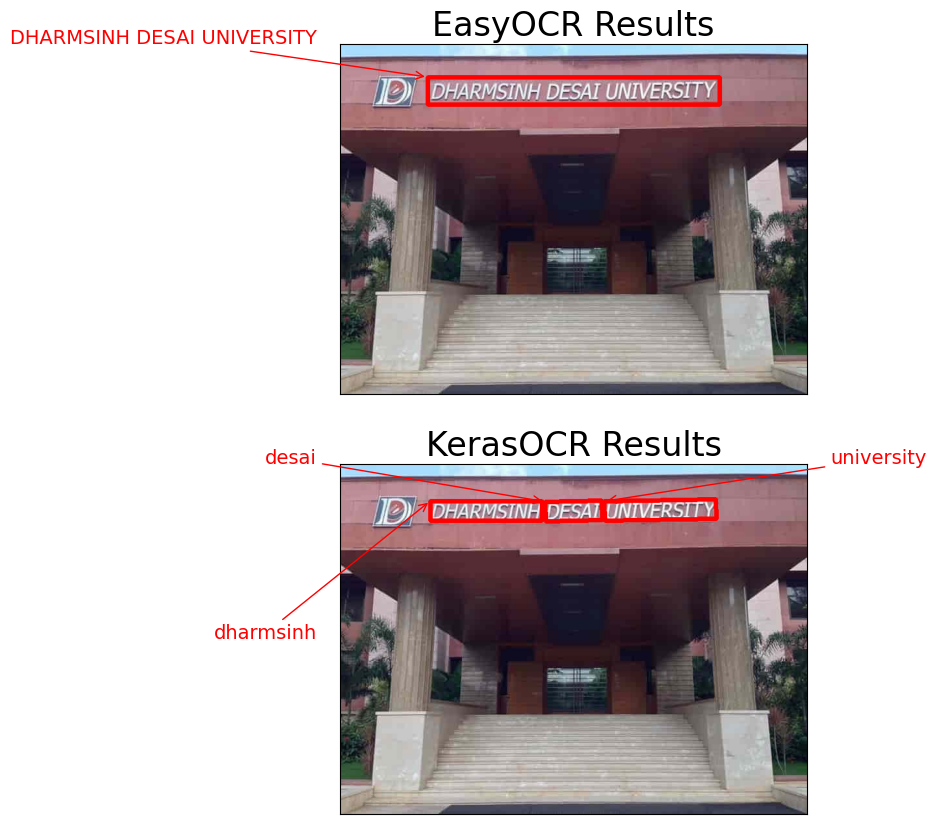

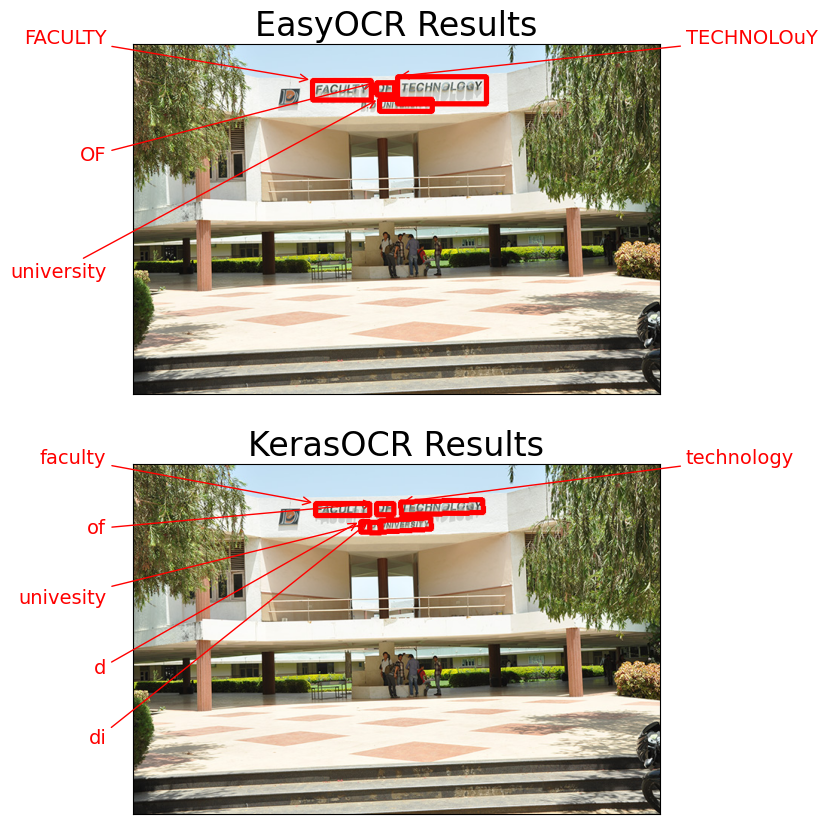

In [ ]:
# Visualization
print("\nVisualizing OCR Results...")
print("\n\n")
plot_compare(image_path_1, easyocr_df_1, kerasocr_df_1)
print("\n\n")
plot_compare(image_path_2, easyocr_df_2, kerasocr_df_2)